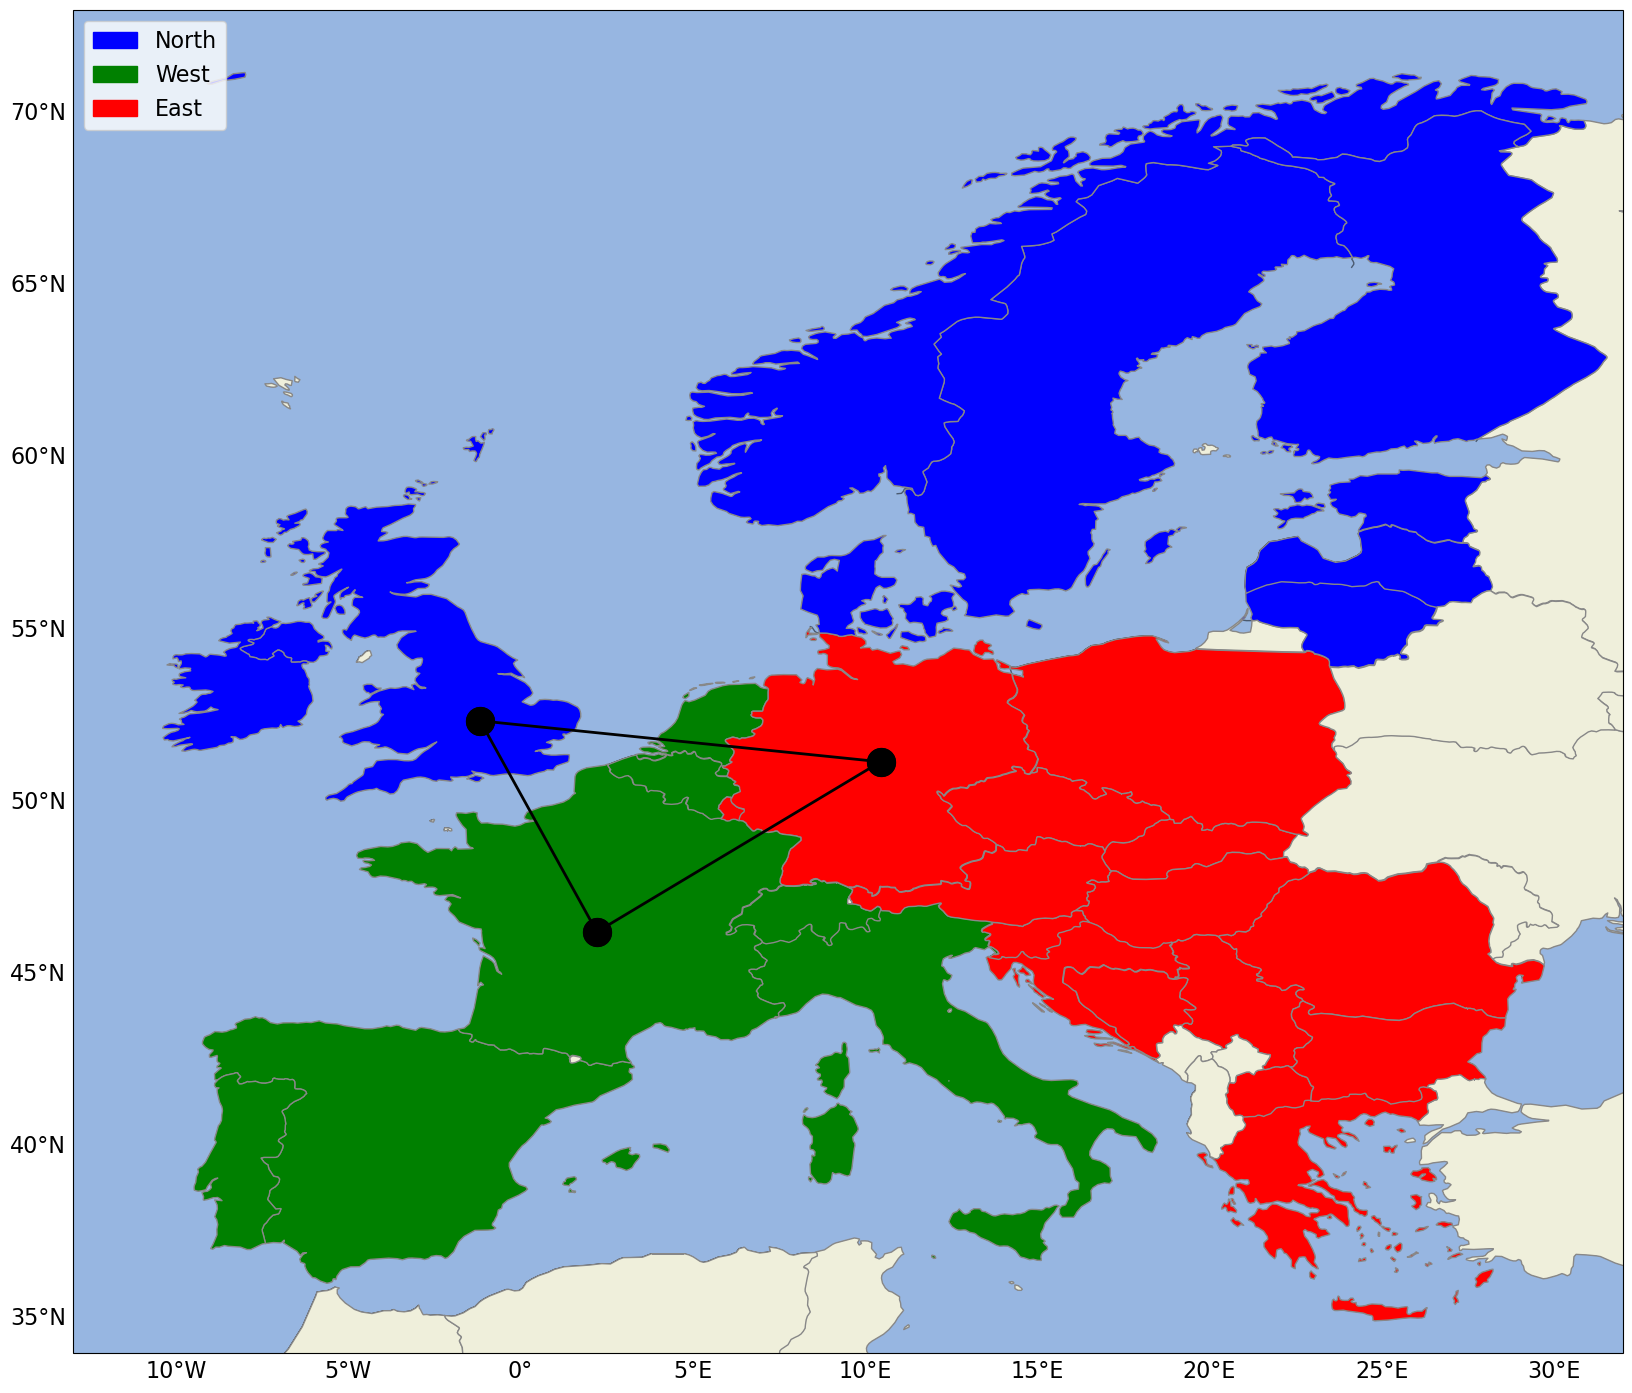

In [3]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Create a figure and axis object with a desired projection
fig, ax = plt.subplots(figsize=(20, 20), subplot_kw={'projection': ccrs.PlateCarree()})

# Add land and ocean features
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.OCEAN)

# Add country borders
ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)

# Load country borders data
shpfilename = shpreader.natural_earth(resolution='50m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()

# Define the regions
north_countries = ["Denmark", "Finland", "Sweden", "Norway", "United Kingdom", "Ireland", "Estonia", "Latvia", "Lithuania"]
west_countries = ["Belgium", "Spain", "France", "Switzerland", "Netherlands", "Portugal", "Italy"]
east_countries = ["Austria", "Bulgaria", "Luxembourg", "Czechia", "Germany", "Greece", "Croatia", "Hungary", "North Macedonia", "Poland", "Romania", "Serbia", "Slovenia", "Slovakia", "Bosnia and Herz."]

# Loop through countries
for country in countries:
    country_name = country.attributes['NAME']
    # Color code countries based on region
    if country_name in north_countries:
        facecolor = 'blue'
    elif country_name in west_countries:
        facecolor = 'green'
    elif country_name in east_countries:
        facecolor = 'red'
    else:
        facecolor = '#EFEFDB'  # Default color

    # Plot country with appropriate color
    ax.add_geometries(country.geometry, ccrs.PlateCarree(), edgecolor='#888888', facecolor=facecolor)

# Define centroid coordinates for UK, Germany, and France
node_coordinates = {
    "United Kingdom": (-1.1743, 52.3555),
    "Germany": (10.4515, 51.1657),
    "France": (2.2137, 46.2276)
}

# Plot node connections and markers
for source, target in [("United Kingdom", "Germany"), ("United Kingdom", "France"), ("Germany", "France")]:
    source_coords = node_coordinates[source]
    target_coords = node_coordinates[target]
    ax.plot([source_coords[0], target_coords[0]], [source_coords[1], target_coords[1]], color='black', linewidth=2, transform=ccrs.PlateCarree())
    ax.plot(source_coords[0], source_coords[1], marker='o', markersize=20, color='black', transform=ccrs.PlateCarree())
    ax.plot(target_coords[0], target_coords[1], marker='o', markersize=20, color='black', transform=ccrs.PlateCarree())

# Set the map boundaries
ax.set_extent([-13, 32, 34, 73], crs=ccrs.PlateCarree())

# Add legend
north_patch = mpatches.Patch(color='blue', label='North')
west_patch = mpatches.Patch(color='green', label='West')
east_patch = mpatches.Patch(color='red', label='East')
ax.legend(handles=[north_patch, west_patch, east_patch], loc='upper left', fontsize=16)

# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True)
gl.top_labels = False
gl.right_labels = False
gl.xlines = False
gl.ylines = False
gl.xlocator = mticker.FixedLocator([-10, -5, 0, 5, 10, 15, 20, 25, 30])
gl.ylocator = mticker.FixedLocator([35, 40, 45, 50, 55, 60, 65, 70, 75])
gl.xlabel_style = {'size': 16}
gl.ylabel_style = {'size': 16}

# Show the plot
plt.savefig("OtherPlots/europe-map", bbox_inches="tight")
plt.show()